In [1]:
import pickle
import pandas as pd
import numpy as np

# Load in the data

In [2]:
xls = pd.ExcelFile('crunchbase_monthly_export_d43b4klo2ade53.xlsx')

In [3]:
df1 = pd.read_excel(xls, 'Investments')
df1 = df1[(df1['funded_year'] >= 2004)]
print(df1.shape)
df1 = df1[df1['raised_amount_usd'].isna() == False]
df1 = df1[df1['company_name'].isna() == False]
df1 = df1.rename({'fILIPPO Murroni':'investor'},axis='columns')

print(df1.shape)

(112508, 24)
(99718, 24)


In [4]:
df_base = df1[['company_name','company_market','company_region']]
df_base = df_base.drop_duplicates();

# Add column for acquired/ipo companies

In [5]:
# Create a dataframe of all acquisitions
df_acq = pd.read_excel(xls, 'Acquisitions')

# List of all companies that have been acquired
acquired_list = list(df_acq['company_name'])

with open("ipo_company_list.pickle", 'rb') as picklefile: 
    ipo_company_list = pickle.load(picklefile)

In [6]:
# Function to check whether a company has been acquired or not.

def acquired_check(i):
    if (i in acquired_list) or i in ipo_company_list:
        return 1
    else: 
        return 0

In [7]:

df_base['acquired'] = df_base.company_name.map(acquired_check)

# Add in column for ranked investors

In [8]:
with open("investors_df.pkl", 'rb') as picklefile: 
    df_investors = pickle.load(picklefile)

In [9]:
df_investors.head()

,invested_companies,no_investments,total_investment
investor,,,
Ekaf,[AndrewBurnett.com Ltd],1,0.0
ANTONIO MURRONI,[ABO Data],1,1000000.0
FILIPPO Murroni,[ABO Data],1,1000000.0
CRP Companhia de Participações,"[Ikro, Laboratórios Noli, Indelsul, Polimax, M...",34,179682716.0
Chinese Academy Of Sciences,[Lenovo],1,0.0


In [10]:
df_investors.describe()

,no_investments,total_investment
count,22037.000000,2.203700e+04
mean,5.193039,5.811218e+07
std,21.627151,3.622520e+08
min,0.000000,0.000000e+00
25%,1.000000,5.000000e+05
50%,1.000000,2.600000e+06
75%,3.000000,1.630000e+07
max,776.000000,1.649072e+10


In [11]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
    print(i)
    print(df_investors.total_investment.quantile(i))

0.1
40000.0
0.2
300000.0
0.3
770000.0
0.4
1500000.0
0.5
2600000.0
0.6
5069024.000000001
0.7
10750000.0
0.8
26000000.0
0.9
79500000.0
1.0
16490723024.0


In [12]:
# From describe we get the quantiles of 1.63*10^7, 2.6*10^6, 5.0*10^5 and 0.

def get_rating(x):
    if x > 79500000.0:
        return 10
    elif x > 26000000:
        return 9
    elif x > 10750000.0:
        return 8
    elif x > 5069024.0:
        return 7
    elif x > 2600000.0:
        return 6
    elif x > 1500000.0:
        return 5
    elif x > 770000.0:
        return 4
    elif x > 300000.0:
        return 3
    elif x > 40000.0:
        return 2
    else:
        return 1
        
        

In [13]:
df_investors['rating'] = df_investors['total_investment'].map(get_rating)

In [14]:
# Creata a list of dictionaries for all investors for each company

company_list = list(df_base.company_name)
company_dict_list = []

for i in company_list:
    print(i)
    temp_df = df1[df1.company_name==i]
    company_dict_list.append({'company':i,'investors':list(temp_df.investor)})

company_dict_list


KAYAK
BitWave
VirtualLogix
Pluck
Pure Digital Technologies
Skyhook Wireless
Deem
Sinosun Technology
Xunlei
Acronis
iSoftStone
Pandora Media
PlayFirst
Tableau Software
Critical Media
Socialtext
CartMomo
WiSpry
Tricycle
SideStep
Whale Communications
MyHeritage
GPal
Soundflavor
Faves
SimulScribe
Executive Caddie
Jobs2Web
Nallatech
thereNow
Actimize
Visionnaire
Photonic Materials
Athenix
Tatara Systems
ChannelAdvisor
Neven Vision
TransMedics
EnOcean
Cyclacel Pharmaceuticals
Alibaba
DigiFun Games
Focus Media
Widevine Technologies
OpTier
Go2call.com
KoolSpan
Cornice
VisualOn
Innovative Silicon
gate5
Trigence
Gracenote
Skype
WeatherBug
Quigo
Tarena
5173.com
Zango
ReachLocal
ExpertFlyer
Aperto Networks
ARKeX
Uprizer Labs
Polimetrix
Mobile365 (fka InphoMatch)
StrongView
Taigen
Sepaton
BelAir Networks
Modulus Video
Mobissimo
Plaxo
LiveOps
Tesla Motors
Advaliant
TechFaith Wireless Technology
Diodes Incorporated
iMusica
Wowan365.com
Colizer
Paltalk
PixelPlay
RDA Microelectronics
NightHawk Radiolog

H-care
Reef Point Systems
Sword Diagnostics
Jobfox
NSC
Surphace
Biosystems International
Tigerstripe
Innovationszentrum fÃ¼r Telekommunikationstechnik
Ipsat Therapies
Applimation
Bluestreak Technology
Coreworx
Blue Security
OpenTrust
Caspian Learning
Mitra Medical Technology
Siano Mobile Silicon
Appfluent Technology
Elixent
Trapeze Networks
EiRx Therapeutics
Idylis
Digital Safety Technologies
BTI Systems
Xenome
Third Brigade
Applied MicroStructures
Universal Ad
Sparus Software
Brainsgate
INRIX
Reliance Globalcom
Iridian Technologies
Epos
Core Security Technologies
Palisade Systems
Mintera
Zilker Labs
Anystream
NexWave Solutions
DNage
Memento
Teros
Network Chemistry
immatics biotechnologies
Laszlo Systems
Gennio
Distra
Kazeon
SoftRun
TeraVicta Technologies
BeVocal
BeamExpress
InnerWorkings
SenSage
TAGSYS RFID Group
Ingrian Networks
Bivio Networks
MessageGate
Intense
Morpho Technologies
BDNA
Nakina Systems
Simpler Networks
SDL Enterprise Technologies
Xelerated
T-RAM Semiconductor
FirstHa

Silver Peak
Vivox
Axerra Networks
Mirapoint Software
Bit9
Offermatica
Everdream
Carbon Design Systems
Molecular Imprints
Kromek
Capella Photonics
Blue Vector Systems
SugarSync
Mirage Innovations
Giritech
Amtec
Engana Pty
Sensicast Systems
Natrix Separations
BlueNote Networks
mPortal
Virtual Iron Software
Aquantia
Open Silicon
Lambda OpticalSystems
Imsys
Chroma Energy
Paxera
Identity Engines
Nexx Systems
Graitec
Azul Systems
Performance Technology
Zillow
Automattic
Newforma
Trutap
EBR Systems
ZBD Displays
TrustedID
iViZ Security
Jingle Networks
Digg
Wetpaint
Telegent Systems
Arch Rock Corporation
Platial
Kodiak Networks
Jambo
Pathwork Diagnostics
SHOP.COM
EchoSign
Meebo
eJamming
AGEIA Technologies
Player X
WAY Systems
Privacy Networks
Lumidigm
Previstar
Kalido
Fluidinova - Engenharia de Fluidos
iPolicy Networks
Ultriva
Hands-On Mobile
CyOptics
Zvents
NewCross Technologies
VoiceObjects
WANTED Technologies
Evolve Partners
Traiana
Envox Group
Sensory Networks
Klee Data System
Flexcom
Virtu

Mobius Microsystems
MarginPoint
Specific Media
AdECN
Retrevo
Pandora.TV
Collective Intellect
Edinburgh Robotics
Ambarella
Tarari
Gizmo5
Amalfi Semiconductor
IGA Worldwide
Peanut Labs
CiRBA
H2HCare
Smilebox
Madhouse Media
Edenbase
Rhapso
The Optima
Stardoll
MySQL
SpectraLinear
Authenticlick
A123 Systems
58.com
China Broad Media
IMVU
Skinkers
Visonys
Flixster
ClearMyMail
Zooomr
C9 Inc.
Anam Mobile
InnoCentive
ATEME
xaitment
Spectra Analysis Instruments
LibreDigital
Apertio
Anthology Solutions
Actionality
Imprivata
Fon
Essensium
Network Vision
Everest Software
Penguin Computing
Technologie BiolActis
Podcast Ready
Mazu Networks
Kasenna
Eastbeam
Alfresco
GameLogic
Finjan
Comet Solutions
PingCo.com
Cybernet Software Systems
MyStore.com
DFT Microsystems
Catalyst Biosciences
AWR Corporation
Let it Wave
Bitboys Oy
Tangoe
BONESUPPORT
Marqui
Knotice
Recordant
Xerographic Document Solutions
Seemage
Verix
Lightstorm Networks
Reactivity
Netli
Lectus Therapeutics
42Networks
RFI Global Services
Demand

ClassifEye
Supertec
Kalon Semiconductor
Zoove
NearbyNow
Autotask
Compiere
Sabrix
Adeze
IndiaIdeas
OpVista
Aligo
JRD Communication
Blueheath Holdings
SiOnyx
ServiceBench
Biocrates Life Sciences
Biocept
JibJab
Youth Noise
Adnexus
Pyxis Technology
Vanatec
iWeb Technologies
Solido Design Automation
Stretch
Identec Solutions
Attune Systems
WhiteHat Security
GloNav
XDC
Genelabs Technologies
Teikon
Cranite Systems
Fonix
Dune Medical Devices
DVDPlay
ASSET4
Daylight Solutions
NanoCompound
Yodlee
Scintera Networks
Clear2Pay
FIT Biotech
ePAC Technologies
AppLabs
ArcSight
Mondeca
Firethorn
StoreAge
Phanfare
Metacafe
Neocleus
Design LED Products
Douban
Snapvine
Vuze
Isolation Sciences
Netragon
Rakuten MediaForge
H-umus
Winking Entertainment
Aeluros
Kang Hui Medical Instrument
GlycoVaxyn
PayMate India
Kontera
Aerohive Networks
Habbo
SouthWing
ARPU
SnappCloud
Kangsheng Chuangxiang
Zhanzuo
PlayMotion
ShopWiki
TakeLessons
Eglue Business Technologies
Cellvine
Biometric Security
m2p-labs
Mavenir Systems


NorSun
FanLib
Move Networks
Scali
Verdande Technology
Aposense
Texxi
Ontela
Datamars
Talyst
TranSiC
Mascoma
IPP of America
Venafi
Mobile2Win India
Etology.com
QBInternational
Skelta Software
MyMiniLife
Neurotech
IronGate
Oxtox
Voyage Medical
SeeSaw Networks
Health Hero Network(Bosch Healthcare)
Conclusive Analytics
InhibOx
Solaicx
Vocera Communications
Intematix
Ambria Dermatology
Excel Energy
Intradigm Corporation
Natural Convergence
Teranetics
CableMatrix Technologies
Prolacta Bioscience
Spark Etail
Uptake
Syntropharma
greenovation Biotech
OZ Communications
Kelway
STARFACE
Digital Performance
Ubitexx
First Coverage
iNeoMarketing
Elixir Pharmaceuticals
iSkoot
Apex Learning
Impedance Cardiology Systems
CureDM
Intellistream
Five Star Technologies
SPI Lasers
Wimba
ERA Biotech
Renovar
Mission Research
Jiangsu Shunda Semiconductor Development
SARcode Bioscience
Aileron Therapeutics
PixSense
Sinequa
Chumby
Kiptronic
Zing Systems
Paver Downes Associates
Construction Software Technologies
Spo

Aerovance
FastScaleTechnology
MAP Pharmaceuticals
Freedom2
AudioPixels
NetPress Digital
Moblyng
Cognio
Coapt Systems
Digital Fuel
Prognomix
Games2Win
Memory Pharmaceuticals
Cortona3D
e-channel
neoSaej
Cartasite
Optovue
Cell Medica
Affibody
Sien
GT Nexus
Amrit Advanced Biotech
WooMe
Mobibase
Avvo
Enswers
Avega Systems
Baike.com
ScanScout
WorldWide Biggies
Perfect Escapes
IKANO Communications
Netlog
Aipai
MyLife
Huan Xiong
Sanwu Internet Technology
bluepulse
MobileVeda
Chemclin
NuConomy
Inertia Beverage Group
Sana Security
Radius Health
PACE Aerospace Engineering and Information Technology
Ceedo Technologies
Advanced Chip Express
OZON.ru
eZ Systems
Intransa
Innovasic Semiconductor
GenVault
Proximetry
ForeSee
Firm58
Extreme DA
Copanion
Estrategias y Procesos para Portales Corporativos
YouMail
TrenStar
Aquaporin
NitroSell
Alter-G
Integrated Trade Processing
Indisys
X-1
Cybera
FonJax
Conviva
Outspark
HowStuffWorks
BioWizard
U.S. Fiduciary
PluroGen Therapeutics
PhotoShelter
MESoft
Ludia
Sili

DemandTec
Intune Networks
Parade Technologies
CE Info Systems
Extend Health
Xtera Communications
Zafu
Paymentus
Tiscali UK
VistaGen Therapeutics
SampleOn Inc
Restoration Robotics
Mercateo
Sonicbids
Glide Pharma
Rontal Applications
Molecular Partners
Kibboko, Inc.
Tenaxis Medical
Sierra Surgical
GeMeTec Metrology
Elastra
Signicat
Rive Technology
Metrolight
PlumChoice
The Broadband Computer Company
Valderm
Re5ult
3i Systems
Inventure Chemicals
VytronUS
Exabre
Novafora
Brijot Imaging Systems
Metastorm
Diligent Technologies
Vibrynt
xMatters
Proteros biostructures
CafeMom
Great Lakes Pharmaceuticals
Analiza
Logos Energy
Bioservo Technologies
Luminary Micro
TradeBeam
CYA Technologies
Aito Technologies
Editlite
KINAMU Business Solutions
Food Quality Sensor International
MocoSpace
TraceSecurity
ECO-SAFE
Agendia
Presidio Pharmaceuticals
SayNow
McKinstry Reklaim
What They Like
Zayo
Innovectra
Solexant
FlowCardia
Factor Technology Group
Grocery Shopping Network
Plextronics
Preferred Systems Solut

Studyplaces
Drimki
WhereverTV
Nanoledge
800APP
Bloom Energy
HiWired
9DIAMOND
OpenStudy
AccelGolf
Biotronics3D
BehavioSec
Prezi
EnerTech Environmental
Livemocha
BigTent Design
FetchBack
Virtual Incision Corp (VIC)
Roku, Inc.
Optimal, Inc.
Stitcher
Pond5
Wego
Zmags
Cooking.com
17u.cn
EZ-Apps
ice
Hypercontext
Deeplink
betaworks
SEOshop Group B.V.
Freepath
FOXTOWN
Changelight
Nuokang Medicine
Y&J Industries
USB Promos
Jellyvision
RxVantage
Kaos Solutions
Stratus5
Jinni
StepOut
Mill River Labs
VivoText
iOpener
TeleFlip
Mojiva
Fundability
Kluster
SuperDerivatives
Evri
DeciZium
Heroku
Vizerra
Shoeboxed
Clickst
SlideShare
Morf Media, Inc.
DeepRockDrive
Hallpass Media
Check
Vivity Labs
Find That File
LiquidPlanner
Shutl
whereIstand.com
BalconyTV
SIFTSORT.COM
Bahamaslocal.com
DataLocker
Zefanclub
AdExtent
OfferLounge
Transactis
Stumpedia
BRAINDIGIT
Hypios
HobbyTalk
eblizz
Topsy Labs
Personera
Thismoment
LocalEats
YouFig
IGG
Hi-Tech Solutions
Onaro
N2N Commerce
Active DSP
NetRetail Holding
Techni

Astute Medical
Increo Solutions
Deep Casing Tools
studdex
TxVia
BumpTop
TownHog
Oriental Cambridge Education Group
doubleTwist
Authix Tecnologies
Paymate
CREAT
Plusmo
Hotlist
WGT Media
Huddler
POLYBONA
Andera
Application Experts
Foodzie
Devver
UsingMiles
DailyBurn
Occipital
Labmeeting
Posterous
Cloudant
DebtMarket
Ecogii Energy Labs
Idhasoft
MergeOptics
Mahindra REVA
Inuk Networks
NineSigma
Silver Lining Solutions
Sand 9
MarketLive
SkillSurvey
Crossing Automation
Leostream
Winbox Technologies
PurePlay
Clearwire
ACT Biotech
Secure Fortress
ON24
Le Floch Depollution
Ecast
XunLight
SelStor
Element Works
Metis Technologies
Surf Canyon
be2
Airship Ventures
Extreme Enterprises
Multiwave Photonics
Compufirst
Neli Technologies
Veodia
Multigig
CitizenHawk
ME911
Gevo
H2scan
CoaLogix
FTRANS
Ocean Outdoor
Silatronix
Sometrics
Security Innovation
Beam Express
Yast
Netsonda Research
Advanced Materials Technology International
SatNav Technologies
InSite Wireless
American Biomass
RSI Content Solutions

AdRoll
Qype
Punchbowl
SolarReserve
GB Environmental
Excelsoft
Rapid7
PicApp
WEbook
Leapfrog Online
Big In Japan
Hollywood Interactive Group
Artificial Solutions
VOSS Solutions
AuthorityLabs
Microstaq
C2C Link
CityVoter
VAIREX international
Aconex
Connectiva Systems
Telligent Systems
Recurve
Radialpoint
American Hometec
Tipjoy
Confluence Solar
Northern Power Systems
UTOPY
Ostara
Cramster
Silver Tail Systems
Akvo
UiTV
SweetLabs
GigaTrust
AWS Electronics
C4M
Urbasolar
KaliteUKASH
The New Forests Company
Skydeck
Accellos
APT Pharmaceuticals
Sleep.FM
Juventas Therapeutics
Konarka Technologies
UserZoom
Yuepu Sifang
mobiManage
Fangjia.com
Moviestorm
Spotify
Viewster
Ironwood Pharmaceuticals
YiBai-shopping
Librestream Technologies Inc.
Cyrba
Guangzhou Metech
Kaai
Z2
Hubs1
Novast
Metaforic
Penstar Technologies
Kylin Network
mobilePeople
Solavista
Re-Compose
Neuralitic Systems
Znode
SCI Marketview
Redwood Systems
Ampex
Avaak
Crisp Media
Cicero Networks
OrthoScan
MyShape
Oberon Media
cacaoTV
Wave

Rockmelt
Portero
KongZhong
LogoneX
LuckyCal
Versonics
Appfrica
Virgance
ImaCor
Spreadshirt
Pufferfish
SocialChorus
Skimlinks
Rivulet Communications
Whitevector
M3X Media
Mendeley
Principle Energy Limited
Selecta Biosciences
GenoLogics
Ocarina Networks
Eiger BioPharmaceuticals
SEPMAG Technologies
Xray Imatek
PlaceVine
Emerge Studio
Bee Networx (Astilbe)
NeoSystems
Genasys
LicenseMetrics
Arzeda
Face.com
Anagnostics
Network Intelligence
Rennovia
Zoom Media & Marketing - United States
Aigou
Fermentalg
Mytopia
Market Force Information
Neuros Medical
Real Time Genomics
CrowdFlower
FanBridge
Pathway Medical Technologies
Numerate
Stemgent
Tuniu
Lifefactory
Invincea
PAX Global Technology
LensX Lasers
APR Energy
citiservi
New Leaf Paper
DDVTECH
Aridhia Informatics
Tempus Global
Collecta
BigTree
Tynt
FSV Payment Systems
Phybridge
OmPrompt
Box & Automation Solutions
eBIZ.mobility
BioMCN
LEYIO
Central Test
Onset Technology
Kylin Therapeutics
CSL DualCom
Ofidium
Simulmedia
Nimbit
SynapCell
Vita Soun

Beijing NetentSec
Fashion Playtes
Vamosa
ShoutNow
Neurosearch
CrimeReports
ClearAccess
Reenergy Electric
Scoreloop
Neos Corporation
Wanova
DailyBooth
FabriQate
Pantech
CEL-SCI
SocialDeck
NanoSteel
SunGard
Surrey NanoSystems
Fanbase
Audible Magic
ProFibrix
Spawn Labs
TeachScape
MiniBanda.ru
Smith & Tinker
Gloucester Pharmaceuticals
Shanghai SynaCast Media
eBuilder
EverPower
RightsFlow
AdScoot
isocket
LendKey Technologies, Inc.
VibeSec
Linksify
ClearEdge Power
Solvate
ClickEquations
Seeo
Vidly
Medsphere Systems
Calix
Virtustream
eTec
LearnVest
Consumer Health Advisers
eIQ Energy
PlusFourSix
SafetyWeb
Shanghai Anymoba
Storm Media Innovations Inc
Letsgofordinner
SpareFoot
Venturepax
DoesThatMakeSense.com
Sofa Labs
Chenguang Biotech
C2Call GmbH
Bosideng
Queplix
Keniu
Tube2Tone
Shareaholic
Getlenses.co.uk
Glory Medical
BedyCasa
Rackup
BrightScope
Cristal Studios
Lexity
Znaptag
Offees
CreditPing.com
Cazoomi
SafetyCertified
Fluidinfo
BlossomandTwigs.com
RadiumOne
eCareDiary
Convertigo
BPT
Numa

PapayaMobile
Identified
Sqoot
Sapato.ru
ithinksport
Mailjet
sunne.ws
Small Demons
CivicSolar
Room 77
Pinterest
Rocketfuel Games
Artsy
Moat
1000memories
Yogurt3D Engine
FutureAdvisor
Oris4
Spectralmind
Crown in Town
Relationship Science
Vectra Networks
BizArk
Cloud.com
Sjapper
Greenbird Integration Technology
Free & Clear
Scoville
PaperG
Healthagen
Decide.com
ZipList
WindPole Ventures
Xageek
Ium
Mopapp
Related Content Database (RCDb)
Yebhi
Imagga
MyWebzz
Wit studio
YPX Cayman Holdings
GetGlue
nPicker
19pay
Visibiz
United Parents Online Ltd
Ology Media
RealDirect
EmergentDetection
TrustCloud
Opzi
SocialBuy
Shopgate
Rocketboom
Marketecture
Inkling Systems
Thwapr
Mavizon
RunSignUp.com
Adjudica
BuzzVote
Bouf
Brightfish
Kijubi
MobiPixie
DataSift
PostHelpers
RedCap
DailyDigital
Duda
Trulioo
SpinTheCam
Cybronics
AJ Consulting
CHSI Technologies
Food52
Badgeville
KFL Investment Management
Nimble CRM
ZangZing
Foodem
Gogiro
Sidecar.me
YouTern
BeeFirst.in
Gucash
Geoli.st Classifieds
oneDrum
Clearpa

UberMedia
PostalGuard
Rockola Media Group
Passman
Modular Robotics
Tap 'n Tap
Velsys Limited
OrthoHelix Surgical Designs
ZoomSafer
Nautilus Neurosciences
TweetPhoto
XDN/3Crowd Technologies
Metagenomix
MyLikes
TellApart
VM6 Software
Blue Frog Gaming
RentWiki
Aureon Laboratories
Spredfast
ONFocus Healthcare
FMP Products
Jack and Jake’s
SavvyMoney, Inc.
Rei-Frontier
The Hut Group
Wedit
Tragara
bettermarks
The Grommet
Where I've Been
Nervogrid
Proven
Datameer
Desk
Radiant Communications
IDENT Technology
GoalSpring Financial
iCetana
GreenWizard
eeden
KBJ Capital
Beijing Feixiangren Information Technology
ubitus
MyNines
Sponge
Shiftboard Online Scheduling
XOS Digital
3scale
MarketFactory
Synerchip
Wibiya
Modular Patterns
HemaQuest Pharmaceuticals
Catabasis Pharmaceuticals
Media Temple
Rethink Books
Shasta Crystals
Gymbox
Brickstream
Zenitum
Macheen
Everyclick
Beyond Oblivion
AiCuris
NuPathe
ProtAb
LayerGloss
GameChanger Media
PicRate.Me
Groove Biopharma.
SolarBridge Technologies
Incuron
Bona

KOALA.CH
Yatown
Hari Seldon Corporation
BTR
Kiwiple
NewsPin
Bunkspeed
Meituan.com
Beijing Joy China Network
Appticles
Neptune Mobile Devices
Spot Influence
StatsMix
ScriptPad
InvitedHome
Lumatic
RoundPegg
Rolith
VDP
Togic Software
Stroodle
Fair Observer
Buzzero
SiteBrains
inMarket
The Wedding Favor
MogoTix
Rapportive
Lazarus Therapeutics
PlayOn! Sports
Notonthehighstreet
Profitably
CRE Secure
Payfone
InSphero
Explorys
EntomoPharm
Entech Solar
TM3 Software
WeShop
Blue Cod Technologies
StatSheet
BoxTone
SolidFire
FuturaMedia
Embedly
APEPTICO Forschung und Entwicklung
ADstruc
2080 Media
Orthos
Redbeacon
Avere Systems
SPARQ
EdgeWave Inc.
Ozsale
StartWire
Kilimanjaro Energy
Time Solutions
Raptor Pharmaceuticals
Callvine
WikiMart.ru
TetraLogic Pharmaceuticals
Ciespace
WorkFlex Solutions
Visterra
HipChat
G5
Satin Technologies
Manzuo.com
Empire Avenue
Appbistro
CloudCrowd
Servio
CeNeRx BioPharma
Metamark Genetics
Weatherista
CAL Cargo Airlines
Calxeda
Next Step Living
C7 Data Centers
24M Techn

SurveyMonkey
yoone
FlockOfBirds
apstrata
Red Foundry
H.BLOOM
DICOM Grid
WeSpire
Fabrus
BaubleBar
Axial
Gazillion Entertainment
Trooval
REAC Fuel
Main Street Stark
PiCloud
Blaze.io
Vipshop
Ebyline
Xeros
Valmet Automotive
Hutchison MediPharma
Coolerado
SenseLogix
OnGreen
ZEFR
Shareable Ink
Gluster
CoverMyMeds
Sprout Social
Petflow
Mixed Media Labs
Convo Communications
NovaTract Surgical
Lot18
Open English
nContact Surgical
Pixable
RealGravity
Rhythm NewMedia
MedSolutions
Coro Health
DataPop
Arbor Pharmaceuticals
AI Merchant
Movirtu
Houzz
Retailigence
Delenex Therapeutics
G-volution
ConnectEdu
Vertical Wind Energy
X2TV
Massive Damage
Verastem
Vizibility
Seedcamp
Yummly
Pro 3 Games
RepRegen
Winchannel
Verismo Networks
Venyu Solutions
Beautylish
Good Men Media
Jump On It
Althea Systems
Tango Health
Leftronic
Optireno
Stipple
Topguest
Vivacta
eVestment
JumpSeller
Fashism
PhotoSolar
Lionside
Rock Flow Dynamics
Rocket Relief
homedeco2u
nlyte Software
SocialProof
Svpply
Zamzee
StemCyte
Hashable

uKnow Corporation
MCI Group Holding
3rd Planet
ADENTS HTI
Re Pet
Inveni
Conatus Pharmaceuticals
Siine
UTILICASE
One Kings Lane
eBioscience
BookShout!
C3Nano
Punchd
Good Deal
Draft
Interactive Investor
amBX
The Glampire Group
CashStar
Luxury Fashion Trade
Kona DataSearch
Desura
Rated People
Yoyi Media
Biomatrica
Findery
ecoATM
Vega-Chi
ThingWorx
VISUAL NACERT
Preventice
Pipewise
Dynamic Signal
Lendio
Everlaw
Cool Planet Energy Systems
Pixability
Neurotec Pharma
Bionanoplus
Transbiomed
Biopharmacopae
Lattice Incorporated
Paydiant
AppSense
Fuze Network
Dr Sears Family Essentials
GET IT Mobile
hurleypalmerflatt
Amplience
MoviePass
High Throughput Genomics
Transphorm
Grey Area
Phononic Devices
GreenGoose!
Syncapse
Fundly
Pharmaron Holding
HTG Molecular Diagnostics
Nano Terra
Media Chaperone
Catch Media
ZIO Studios
SnapRetail
Kidlandia
TinyCo
Ingeniatrics
SymBio Pharmaceuticals
Base CRM
Vilant Systems
CardioFocus
dotCloud
MyCabbage
DynamicOps
Clickatell
Vitriflex
Hoseanna
SAW Instrument
Arsa

GoldenSUN
24PageBooks
lark
MyCube
Crimson Hexagon
Supercell
Abcodia
AEGEA Medical
Travelmenu
Resilient Network Systems
Milyoni
Personetics Technologies
American Aerogel
Slice
Brightpearl
ViajaNet
Advantagene
Reflectance Medical
Immunetics
JobOn
Ingenic
Lumora
Benzinga
Profound
Informous
SiTime
Verious
Rocketick
Lekiosque.fr
Primus Power
PunchTab
Next Performance
Pixonic
Tracsis
Bluenote
ADVANCE Medical
Estimize
Acceptd
Skipola
Esperance Pharmaceuticals
Realm
Lytro
BuildingLayer
WorldStores
Hortonworks
Hope Street Media
Wisr
Zokos
AwesomeTouch
Inhabi
Punch!
InPulse Medical
EndoSphere
Unique Microguides
Marrone Bio Innovations
Novelo
Visualtising
UYA100
Sapiens
Dream Industries
VitaPortal
EAT Club
Tagbrand
Kyruus
Reclip.It
FullContact
MobileApps.com
Wondershare Software
Ezakus
SightCall
Aiming
Shield Therapeutics
Evision Systems
Centaur
Tap2print
Roomorama
RewardsPay
VIDTEQ India
Noom
Wishdates
Yoke
OpenChime
Kindstar Global (Beijing) Medicine Technology
Thundersoft
Goshi
Exchangery
Cook

ZeroCater
iStoryTime
eFlix
MediaCore
Readz
Nettle
Cedexis
Yaupon Therapeutics
Sanlorenzo
Elevator Labs
ixigo.com
Infinium Metals
Fanzy
Thetis Pharmaceuticals
EcoEridania
TrueStar Group
Go Try It On
Vend
Diagnostic Photonics
WeGoOut
Outroop Inc.
ThinkNear
dianboom
Embera NeuroTherapeutics
Habit Labs
Surreal Games
Clothia
Innovative Card Solutions
Xeebel
Bioceptive
Learndot
HZO
Haolianluo
WRG Creative Communication
KLD Energy Technologies
Kumbuya
23press
PowerInbox
Fluidnet
LiveClips
Librelato Implementos Rodoviários
Backplane
T3Media
Acquisio
North Shore InnoVentures
Resumesimo.com
TouchTunes Interactive Networks
Umami
Cinchcast
gDine
Digiboo
Keystone Dental
UpMo
Clipsource
SEEC AB
Phorest
Spectraseis
NuLabel
Quanterix
EZ4U
KRAFTWERK
Unified Inbox
OneBuckResume
NextDocs
Cleveland HeartLab
Autifony Therapeutics
Medify
MakerBot
Spinifex Pharmaceuticals
Lumicity
6connect
KalVista Pharmaceuticals
1000 Corks
VitaFlavor
Crowdx
YouWeb
Bloodhound
Tinypay.me
Couchsurfing
Occlutech
Taptera
Energy

Tracelytics
1stdibs
Kicksend
Docracy
AudioName
judge.me
Kedzoh
JamOrigin
Virtual Paper
SAMHI Hotels
Pneuron
Hively
ImmuVen
LaunchSide
ClearGist
AKSEL GROUP
Startup Weekend
Mailbox
Cleverbug
Enstratius
Homeschool Snowboarding
LaunchRock
Schematic Labs
Pivot Medical
Precision Biopsy
Comprehend Systems
Tinubu Square
Mosaic Biosciences
Surefire Medical
Lulu
Shout TV
Comic Rocket
Federated Sample
Tinkercad
BiteHunter
Cherry
Mention Mobile
MineralTree
Rempex Pharmaceuticals
COMS Interactive
BeatTheBushes
Mingly
Inova Labs
Koupon Media
AFFiRiS
Any.DO
newBrandAnalytics
ScribbleLive
Sarmeks Tech
Uman Pharma
Ideal Binary
Extreme Reality
ClaimSync
Motion Displays
AllTrails
Fancloud
Wrapp
Karma
Medley Health
CivilisedMoney
simplifyMD
Salorix
atokore
Leonardo Biosystems
WP Engine
Heverest.ru
JobSync
Boundary
FanFueled
Trippy
Zazoo
6Wunderkinder
Allena Pharmaceuticals
Happiest Minds
Intellitix
Nextivity
ServiceMesh
Swag Of The Month
Science
Vidyard
Medivo
Agios Pharmaceuticals
Spotzot
Catalog Spree


Walk Score
DecideQuick
Netgamix Inc
Calligo
Manifest
Stackify
Springest
BlaBlaCar
Prezacor
EyeIC
CD Diagnostics
Tadpoles
ActiveGift
Sharecare
Gidsy
My-Apps
Code42
On The Spot Systems
Onit
Stabiliz Orthopaedics
QR Pharma
Enevo
Identropy
New Era Portfolio
CitiSent
ybuy
DreamCloset.com
RaNA Therapeutics
Vizimax
Comunitae
SphynKx Therapeutics
Fresh Nation
Agradis
Nexenta Systems
Varentec
Brass Monkey
Recon Instruments
Playmysong
The Jetstream
Holganix
Plehn Analytics
Kypha
Peecho
Anaplan
AppAddictive
Knowlarity Communications
HammerKit
Cadence Biomedical
Avila Therapeutics
StitcherAds
Lukkin
Camalize SL
Immunovative Therapies
Revisu
AthletePath
Ichiba
Gramble World BV
vLex
Spinzo
Narrable
orderbolt
JADE Healthcare Group
LaunchGram
HydroNovation
EntreMed
Intelligent Apps (mytaxi)
Better World Books
BuzzDoes
Mykonos Software
Bluestone.com
Glori Energy
Intelligent InSites
ADARA
SquareTrade
Mevion Medical Systems
zappit
Psykosoft
Simply Good Technologies
Bucky Box
Intercom
OneSchool
BugHerd
En

Imimtek
The London Distillery Company
Stylus Media
Bluewater Bio
Edutor
Abingdon Health
Kinnser Software
Kingfish Labs
Blossom
Vigilent
Novapost
Startapp
Exotel
ImaginAb
Esperotia Energy Investments
Red Butler
Domino
Bi02 Medical
tweetTV
Social Shopping Network ®
Exhibia
NewHound
StyleTread
NicePeopleAtWork
MediaPass
Veracity Payment Solutions
Strand Diagnostics
HipSwap
Captronic Systems
LearnZillion
YogiPlay
Loop88
BioMarCare Technologies
InsightsOne
Genalyte
Nimble VR
99dresses
DeNovaMed
ContentDJ
Epirus Biopharmaceuticals
Viveve
Second Genome
Enthuse
orderbird AG
Future Drinks Company
Broccol-e-games
Vinspi
Redu.us
Performance Marketing Brands, Inc.
Avocado™
RecoVend
Tweetwall
Lessonwriter
MoveableCode, Inc.
AutoShag
A Curated World
Thumbs Up
Thryve
Sproutel
Acopio
Project Repat
DIIME
CheckInOn.Me
Africa's Talking
Givkwik
StreetOwl
Boxever
The One-Page Company
Keycoopt
Airtasker
DealAngel
Moovit
eDabba
Ducksboard
NeedFeed
Hatchbuck
VinAsset, Inc (Vertically Integrated Network)
LAFAS

LocBox Labs
SportSetter
zlien
FoodEssentials
datatracker
Reify Health
SumAll
Nonpareil
WANdisco
911 View
Ariagora
Banyan
HD Fantasy Football
Variable
Iron Gaming
Corpora
Omnisoft Services
Tour Raiser
Sravnikupi
TV189.com
Inova Payroll
Acorns
Fulcrum SP Materials
Easyworks Universe
RentHome.ru
Kommerstate.ru
Ebrun.com
MedTech Solutions
JFrog
Understory
Ali
Gokuai Technology
iBoxPay
Visualnest
Advice Wallet
BetterFit Technologies
HandMinder
EcoSurge
Quire
Restore Medical Solutions, Inc.
Urova Medical
TRAKLOK
Wasabi 3D
Agile Wind Power
BucketFeet
Nanoogo
Behavio
Signix
Overdog
Howbuy
Hubble Telemedical
Hapten Sciences
Guangzhou Teiron Network Science and Technology
Mgv
Shahiya
Civo
SwingPal
Nusirt
MedCenterDisplay
Argus Labs
Big Box Overstocks
nediyor.com
Xmybox
Dimeres
Kreditech
Lasso
Whimseybox
Fibroblast
Cureeo
Pictarine
frintit
71lbs
Moxie Jean
OFERTALDIA
Forgame
Good Chow Holdings
Care at Hand
Neumitra
NoviMedicine
Home Team Therapy
RxApps
beStylish.com
Attentive.ly
iHandle
Photorank

Insane Logic
Cloud 66
TrueView
Night Zookeeper
EqualEyes
Sharalike
Gocella
Hand Talk
Plum
LocalMed
Boomset
Wannafun
One Jackson
QuickPay
CitiVox
daPulse
Megadyne
Fabkids
Cortica
Turf Geography Club
Dynasil
creditmontoring.com
Atterocor
Vedantra Pharmaceuticals
Artillery
Procured Health
Mape
DeRev
placespourtous.com
LaunchBit
Ploonge
Easel Learn
FullCircle GeoSocial Networks
Dale Power Solutions
Viraliti
BestSecret.com
Vital Insights Inc.
Therapydia
AwesomenessTV
PLUMgrid
All Campus
FreeMonee
Infratel
ITN Energy Systems
Funium
REALTIME.CO
Printi
Upstart
Inango Systems Ltd
Aentropico
Redis Labs
Pivotshare
Keen Systems
Influitive
4moms
Medical Direct Club
WhistleTalk
Job on Corp.
Deminos
TryLife
OUYA
'Rock' Your Paper
Sinimanes
Memeoirs
FunPuntos
Studio Pangea
Edvivo
Glovico
Kimeltu
Socialance
Review Trackers
Doubles Alley
Sumomi
Targeter App
Touristlink
boaconsulta.com
Akonia Holographics
S4 Worldwide
InsideSales.com
Intercept Pharmaceuticals
Win the Planet
Otto Clave
Voltaic Coatings
IM

Torneo de Ideas
CL3VER
Open Dada Solution Lab
I AM AT
Hiri
Ludium Lab
Marfeel
Dada Room
Chatterbox Labs
the grafter
Social Tools
Superbly
ThoughtBox
Awareness Card
Mobiliz
Modebo
minicabit
SchoolControl
Woopie
Origo.by
Xipin
fishfishme
LiveExercise
One4All
appening
PiniOn
LawKick
LivelyFeed
Connect
Soundwave
docTrackr
Teachbase
Namshi
Zalando
Insightly
CallApp
Oppa
Dyn
ArriveBefore
Clean Air Power
Vestec
Radiation Monitoring Devices
thinkingphones
Kindling
In Hand Guides
NGDATA
SocialThreader
Trifacta
Etogas
Expect Labs
Cozy
BiOxyDyn
Brandlive
SABIA
NowSpots
Clear Books
Shoptiques
STORYS.JP
Graphdive
ONOFFMIX (온오프믹스)
Tactile Systems Technology
Creww
Perfect Audience
RXi Pharmaceuticals
Little Bird
SPEEDELO
Contacts+
Linkpass
VASS Technologies
Motobuykers
Bolooka.com
travelmob
Acertiv
AppThwack
Vadio
KS12
What’s More Alive Than You
Preen.Me
CreativeLive
IngagePatient
SmartFocus
Anametrix
rubberit
RightCare Solutions
Trendabl
Genesis Financial Solutions
Side.Cr
Motosmarty
Compring
Lonest

Attune Technologies
PlayBuzz
Pica8
Testive
Accurate Group
Apptentive
Loadcomplete
InSightec
Material Wrld
Robot App Store
Stocard
Useful at Night
rankur
Habbits
Coherent Labs
Next Points
Owlin
Alkami Technology
Deemelo
JuicyCanvas
Follicum
Judicata
Instant API
MiTu Network
Galera Therapeutics
ZenPayroll
NatureBox
HelloFresh
Prescription Eyewear
River Vision Development
TR Fleet Limited
Koozoo
Applango
Cranberry Chic
Plizy
Canopy Labs
Blueseed
Vivino
Squee
WhipTail
CloudVelocity
Videoflot
Jibe Mobile
ShareYourCart
EasilyDo
Lucid Energy
GigDropper
Ethical Electric
VetCloud
Cinexio
SunnyBump
Billetto
1001 Menus
Urban Compass
Tradegecko
Tindie
PowWowHR
StorPool
KBLE
Flipps
Materialise
GCLABS (Gamechanger LABS)
BCNX
Exablox
AppDisco Inc.
Exo Labs
Booktrack
Run3D
Aerob
AVIS
Fruition Partners
iSnap
Lithera
Obalon Therapeutics
Signifyd
Glow Digital Media
Flit
freee
Catbird
Freightos
Descomplica
FitStar
Allakos
ParkWhiz
DataWare Ventures
Plandree
Within3
Tubular Labs
MobileDevHQ
Lema21
Telerive

Nomi
MetGen
Bright Funds
Livrada
eGifter
Second Light
Kona Group
Linio
Atlantium
Bimbasket
Nok Nok Labs
Post-i
Relay
Cloud Your Car
Blottr
GRUZOBZOR
Goji
Hospitalists Now
GlampingHub.com
Innovand
KnexxLocal
Bombfell
e27
Leanplum
Morta Security
Persado
Bullitt Group
Saluspot
Reactor Inc.
Cylance
Vizolution
InVisage Technologies
Getonic
Autopilot (formerly Bislr)
Lagiar
Sustainatopia.com
SputnikBot
Big Box Labs
Americanflat
Pitadela
Learnmetrics
Virool
Sunshine
HStreaming
Anunta Technology Management Services
Kitchensurfing
Odyssey Thera
Trax Technologies
Quad Learning
Leetech
BlueData Software
Raynforest
GroupTalent
Mambu
Method
DeskGod
Augmi Labs
Luqit
paOnde
Kybalion
E-nterview
Anpro21
Jounce Therapeutics
SeeFuture
AlchemyAPI
ApplyInc.com
Neoprospecta
Go Vocab
Aumentality.cl
Medesen
Medic Trace
RIDERS
Fanear
Nasseo
FireBlade
orangutrans
Inverted Edge
The Business of Fashion
LUX Assure
Helmedix
Biomoti
Let's Jock
1,2,3 Listo
Bizpora
lovemeshare.me
Worldrat
Thinker Thing
PayrollHero
Aug

RR Media
GenSight Biologics
Inquisitive Systems
Connoshoer
Kabanchik
AdviceIQ
Lernstift
Fashion Project
Coinsetter
Garpun
Tripeese
Ibercheck
ItsMyURLs
Cooltech Applications
nuPSYS
Wandera
Lovethelook
Welltok
Community Informatics
walkby
CES Acquisition Corp
CityScan
MedDay
Tynker
Xeneta
Cydan
Ripple Labs
Syros Pharmaceuticals
AgBiome
PlaySquare
CloudCheckr
Le Cicogne
Panviva
Local Corporation
Eduson
Relay Foods
Needbox AS
DueDil
Synthace
Study2gether
Jugo
Binpress
GreenGar
Sverve
School Admissions
DySISmedical
Wummelbox
Provender
Swift Identity
Now In Store
Transit App
CrowdFlik
iTMan
inWebo Technologies
TapDog
Reactful
Comeet
Neura
EZDOCTOR
Nitrous
Envoimoinscher
BEAT BioTherapeutics
RedOwl Analytics
Idibon
PowerbyProxi
EvaluAgent
ANDalyze
Insiders S.A.
Hassle.com
Audibase
Iora Health
The Hunt
Bitium
Piggybackr
Fusebill
Remotium
Rodos BioTarget
BodeTree
Recurious
Nosto
Bangbite
PhoRent
Walkbase
Tamatem Inc.
DSTLD
Tastebuds
Yodo1
Bitbar
Onefootball
Allecra Therapeutics
VersionEye
Style

AxesNetwork
Visualant
get2play
Atria Brindavan Power
Isabella Products
The Gilman Brothers Company
Circular Energy
TastyKhana
Lastline
Scondoo
Prism Pharmaceuticals
Locondo.jp
EsLife
Kukupia
Hiphunters
Jumpido
Propertygate
Elastic Path Software
Joint Loyalty
Opsmatic
The 360 Mall
Fewzion
World BX
Choosly
MemberPass
Chinese Whispers Music
BuyItRideIt
Funidelia
VoAPPs
Medprivé
Tinypass
Snowman
Food Runner
Bumble Beez
cycleWood Solutions
iBuyitBetter
Estimote, Inc.
Snjohus Software
shopa
CADsurf
Inbox
Crest Optics
SiteWit
Usarium
Trigemina
Casa Grande
Oculus VR
Fullscreen
ForSight Labs
TrendPo
Mirabilis Medica
XO1
Rewalk Robotics
Platypus Craft
Amagi Media Labs
Offerboard
Need
Waraire Boswell Industries
Whittl
Cloudtop
Filepicker.io
What's Trending
Flaskon
Cape Wind
Endeavor Energy
Muzy
Cardiff Aviation
Darby Smart
Ayannah
Rockwell Medical
ProxToMe
Community Investors
Neighbor.ly
ActiveCloud
TrackDuck
Parakweet
Reverb.com
Surge Performance Training
HealthSpring
Combatant Gentlemen
Graphit

Engagor
RIVS
ProtoExchange
iBuildApp
Spotsetter
Omni Hospitals
VividCortex
Social & Loyal
Crowdlinker
Logicbroker
Drill Map
Active International
Univision
Avanse Financial Services
NewsBreak
Poliana
dVisit
Rocket Raise
Invision Heart
Gun.io
Aspire Health
Healcerion
UGE
mascotsecret
Nezasa
BuildersCloud
SetPoint Medical
Glow
TandemLaunch
Dragon Innovation
WealthForge
Startups
Newzmate, Inc.
FitBionic
Make Music TV
Acera Surgical
RealRider
Map Decisions
Fitly
Siasto
Lytics
Ignis IT Solutions
Salt Rights
Prized
Perzo
Pansieve
mVakil - Track Court Cases Live
Vitrina
Entangled Media
Ansible
Drik
Greenlight Biosciences
Parsley Energy
Retsly
Bustle
Rainbow Hospitals
MyFitnessPal
EthosGen
Roombeats
eShares
Whisk (formerly Zypsee)
MultiLing Corporation
Hmall.ma
PrecisionHawk
GIDEEN
NearWoo
Bedi OralCare
Arkami
AdWired
VeliQ
Carbay
Petcube
InRiver
Head Held High
Sandwell Community Caring Trust (SCCT)
Antuit
SmartNews
TrekkSoft
SMB Suite
Janalakshmi
Ticket Hoy
Nimble
OnBeep
Swiftype
App.net
Flixe

BioDigital
Verimed
LocalLux
Total Eclipse
Paintzen
Double Doods
Frankly Chat
Appetite+
Plexx
University of Arkansas
Traxo
Databricks
Ranovus
Synergis Education
Saguaro Resources
edjing
Noonswoon
Kira Talent
HackerHAND
NationWide Primary Healthcare Services
Eventtus
HotelQuickly
ustyme
Tokita Investments
Arvinas
LoveLive.TV
LeadPages
VTL Group
MakeSpace
Kupu Hawaii
User Replay
Jobs The Word
Neurotrack
JumpCam
Sikernes Risk Management
Unsilo
Shopular
Attendify
adhoclabs
DropThought
MemberPlanet
Estify
KidsLink
Beats Electronics
Declara
Shyp
Qstream
minubo
Baltic Ticket Holdings AS
hoohbe
Status Work Ltd
Casinity
Azimo
GlamBox
Dataguise
SMASHsolar
360Learning
Ooolala
Relayware
SKURA
Tetra Discovery
GamaMabs Pharma
Cieslok Media
DoorDash
MailTime
Carta Worldwide
Q Design
HuntForce
Leaf
Dubaki
Enmetric Systems
BiddingForGood
Plenummedia
Siamosoci
Monitor Backlinks
Algolia
Casetext
Sparks
cartmi
VINTAGEHUB
Jobspotting
blogfoster
embraase
Leo
Yhat
Perceivant
Beyond Games
PFITR, LLC
91JinRong


Written
Enertec Systems
Plumbr
The Fred Rogers
Fine Industries
Checkmarx
Carousell
PredictionIO
Ezoic
Experience Headphones
Fetchnotes
Orchard Platform
MdotLabs
LapSpace
Mustbin
Moneytree
Kitara Media
HDmessaging
InCights Mobile Solutions
MAG Interactive
Jongla
8Trip
DataRPM
Kidaptive
makr
Gutenberg Technology
Restlet
WhoKnows
Genapsys
Synoste Oy
Lumense
Windsor Circle
BBOXX
Mango
7 Elements Studios
Sungy Mobile
TouchBistro
Greenhouse Software
Acupera
VUID, Inc.
Health Revenue Assurance Holdings
Ad Tech Media Sales
Codesign Cooperative
Bespoke
eBooks in Motion
CloudHashing
Therma Flite
Frugoton
Fishki
Ketto
Acumatica
JustInvesting
Ganymed Pharmaceuticals
Mojave Networks
Farman
Klappo Limited
Rubikloud
discoapi
BTC China
Slidebean
Veacon
Valopaa
Crowdzu
Index
Yub
InfoBionic
Fitfully
Family Nation
TCAS Online
Skilljar
Groopt
PF Management Services
PriceMatch
Restorius
Kamego
SYLLETA
Brainwave Education
Baobab
Copyright Agent
Unicotrip
Colingo
Learn with Homer
Flayr
Zep Solar
Codacy
Rachi

Thumb Reading
Meiyou
Happy Industry
Playto
Sapphire Innovation
Compare Asia Group
3Dmena
Vocalcom
Evoleen
Tute Genomics
Litehouse
Vow
Black Pearl Studio
Chain
Uevoc
Bird Cycleworks
Viva la Vita
Angel Medical Group
Ailvxing net
Shanghai Yinku network
Litographs
Bomboard
Onion Corporation
WhoWantsMe
Jobydu
OOZZ
Povio
Chance (app)
Content Analytics
Plei
Aula 7
DNAdigest
Discoverables
Veronica
Atlantia Search
OvermediaCast
Ads-Fi
Wriggle
Mapkin
Jmdedu.com
ShipBob
Camperoo
Lending Works
Doctolib
Mobile Bridge
Skubana
French Girls
Bluedot Innovation
Biopipe Global
Rebls
OceanTailer
Rapidlea
Snippit Media, Inc.
Goodwall
Mobile Shopping Solutions
Dooda Inc.
Revue Labs
Futon
TapFit
PenPath
AIRVEND
Voxa
Breaker
Lennar Corporation
Precipio
Geo Renewables
Metabolomic Diagnostics
Driblet Labs, LLC
Men's Style Lab
Edison DC Systems
LivBlends
TradingView
Tecogen
NeXeption
VoyageByMe
Pingwyn
Jumblets
Roam & Wander
Repairogen
ZeroTurnaround
STinser
Vidible
PEMRED
Buzzvil
SpeakUp
NutraMed
MarketMuse
Omi

Soundigo
AB Microfinance Bank Nigeria
MaintenanceNet
Caktus
Ambient Clinical Analytics
ePatientFinder
Kanga
Awesome Media, LLC
Inpria Corporation
Smarter Remarketer
Ezetap
Virtual Power Systems
YDEA
Instacoach
mCASH
ThreatStream
SoundFocus
Oceana
BioDatomics
Seno Medical Instruments, Inc.
Salezeo
Palerra, Inc.
ProPublica
Justrite Manufacturing
AppUpper - ASO
Wear My Tags
BlueTalon
ClubLocal
CombaGroup
Kerecis
StormPins
bigtincan
Practice Ignition
Fobbler
Onomondo
Granular
Carwow
Changers
Blued
Hopscotch
Akita
Manomasa
Capos Denmark
HackerEarth
Aurinia Pharmaceuticals
Voalte
Paper Battery Company
Hifi Engineering
TraceLink
Newlans
Cherry Bugs
EnerMotion
Saisei
Mars Bioimaging
Marina Biotech
Ciel Medical
All in One Medical
The Black Tux
Opternative
Hickies
Workboard
Crowdnetic
Coinzone
Ignite Accelerator
Violet Grey
Venuu
XipLink
CyberSense
Remedy Pharmaceuticals
Respiratory Motion
Coretrax Technology
emotion.me
Emerging Tigers
Little Borrowed Dress
BSixGroup
HeartFlow
Vendor Registry
co

Puzzlium
StarWind Software
Rigetti Quantum Computing
Au FINANCIERS
Fitnet
Filmijob
The Nature Conservancy
AAVLife
Netology
Elite Pharmaceuticals
Liepin.com
TYT (The Young Turks)
BiGx Media
UniSmart
Adaptive Biotechnologies
Orderlord
Sustainable Energy & Agriculture Technology
GageIn
M87
Boxbee
Wilson Therapeutics
eCaring
FantasySalesTeam
Procurify
AdverseEvents
RealtyShares
Campaign Monitor
Swipe Telecom
Convergent Dental
Cardiac Dimensions
better.
GNosis Analytics
IndiaHomes
The Young Turks
Accelerize New Media
NetBrain Technologies
Talkwheel
Tokyo Otaku Mode
Nervana Systems
Enplug
Beckon, Inc.
Citymapper Limited
AltraTech
Flywheel Sports
Klaren International
Healthbox
Flodesign Sonics
Nora Therapeutics
Scutum
Urgent.ly
Punch Bowl Social
Vidapp
Squawka
IHS Holding
Inbenta
Lezhin Entertainment
indico data solutions
sourceeasy
Preact
Xhale
Wellcentive
Senseonics
BDS.com.au
Luxtech
Baoku
Penzata
PingThings
Owlet Baby Care
Avalanche Biotech
Yik Yak
Viewpoint Construction Software
CrowdRis

SomaLogic
Cabara
RigUp
Booster Pack
Spinal Kinetics
KemPharm
TrialScope
Medgenome Labs
Lost My Name
Ambition, Inc
Cariloop
Zapya
ATRP Solutions
Aasonn
Lima
Octro
Adarza BioSystems
Siftit
One On One
KidBook
BTCJam
Big Data Partnership
Minova Insurance
Mixify
FortunePay
Cozy Cloud
Triblio
Geewa
wikifolio
Electronic Sound Magazine
Inbilin
The fresh Group
Super Evil Mega Corp
Flexion
Fixstream Networks Inc
Navitas Midstream Partners
kabuku
Aphria
Surefire Social
Adyen
DewMobile
fashionandyou.com
ZAP Group
Recommend
MyTinks
Health2Works
Picfair
Traverse Biosciences
Mesosphere
Move Loot
Class6ix, Inc.
Beauty Works
MicroEnsure
Cldi Inc.
Affirm
FabZat
The French Cellar
Touchtalent
Splitforce
XebiaLabs
ShoppinPal
BlueOak Resources
Exabeam
light
RebelMail
Homestay.com
Airex Energy
CytoVale
WUT
GeoGRAFI
indidebt
GillBus
ZAIUS, Inc.
Dwellable
TurnKey Vacation Rentals
Gatheredtable
Krux
Weeleo
GeoDigital
Weave
McLarens
Social Recruiting
BioSilta
Ibotta
CrowdChat
Crowdability
PopUpsters
Health Integ

Cotopaxi
LifeNexus
BuyHappy
Elevate Research
ClassOwl
BEW Global
Peerlyst
Spectral Edge
Saint Bonaventure University
Sviral
Edaixi
Appdra
TipRanks
FreshBooks
AYOXXA Biosystems
Beanstalk Tax
Worldcoo
GeneCentric Diagnostics
WoraPay
Activehours
Mobile Action
Hypori
Home Chef
Tracksmith
Venari Resources
amcure
Anomo
Weimob
Fangcang
CTD Holdings
GigsJam
Concepta Diagnostics
Tuva Labs
Trello
BrainStorm Cell Therapeutics
VenueBook
Nextnav
Branching Minds
Lea(R)n
reKode Education
Edvisor.io
CreatorBox
Cognotion
VGBio
Physiq
Fixed - Parking Tickets
Spero Energy
Underground Solutions
CrowdCurity
Eventure Interactive
Decision Lens
Solegear Bioplastics
Thinknum
Business Agent
Emulate
Bright Computing
Snapeee
ChoiceStream
SunPower Corporation
Peel-Works
Peekapak
Dental Corp
SkyKick
Ludi
kontakt.io
Sidestage
Riptide IO
Roamer
Exchange Corporation
Bohemian Guitars
Jet
3rdKind
Cold Genesys
Voyat
OBMedical
Kurbo Health
Frameri
Canara
Madwire
ThetaRay
Dianwoba
Helijia
Green Charge Networks
EyeNetra
Kix

Audaster
SolidX Partners
Aventine Renewable Energy Holdings
MASSOLIT
Zakaz.ua
Odilo
DroneDeploy
makemoji
SchoolMint
QuotaDeck
YEDInstitute
iHealth Labs
Clonect Solutions
Genymobile
Cribspot
EdCast Inc.
Delta Data Software
HoneyBook Inc.
Thyritope Biosciences
Silarus Therapeutics
Jike Xueyuan
Le Vision Pictures
Authorea
Datasnap.io
Conzoom
NewsHunt
AVIA
Ardent Capital
Fyreplug Inc.
Gametime
Eureka Therapeutics
Silvercar
Molecular Products Group
Inivata
GoodAppetito
Exo Protein Bars
Andela
OmnyPay
CrowdStreet
miDrive
COTA
COTA Track
AB Tasty
BrandMaker
Soccer Manager
Branch Metrics
Loveland Technologies
Gooddler
BetterWorks
Catawiki
POW
Magnitude Software
SiteOne Therapeutics
Powerlytics
Fablic
The Scripps Research Institute
The Idle Man
POWWOW
uuzuche.com
Qzzr
Centage Corporation
Brainomix
GetFeedback
Accuris Networks
Allele Biotech
myeasydocs
Spruce Health
Buck Mason
VividWorks
Ghostruck
Array Health Solutions
Lodgeo
Nubank
Miaopai
sendwithus
StackAdapt
Apontador
Newelse Inc.
Bensussen

RiverSilica
GLENTEL
Grid4C
Ascendis Pharma
Apellis Pharmaceuticals
NowSecure
Qufenqi
Veniam
Xeltis
Helpling
CANbridge Life Sciences
Vonjour


[{'company': 'KAYAK',
  'investors': ['AOL',
   'General Catalyst Partners',
   'AOL',
   'General Catalyst Partners',
   'Sequoia Capital',
   'Accel Partners',
   'Accel Partners',
   'General Catalyst Partners',
   'Gold Hill Capital',
   'Lehman Brothers',
   'Norwest Venture Partners - NVP',
   'Oak Investment Partners',
   'Sequoia Capital',
   'Silicon Valley Bank',
   'Trident Capital']},
 {'company': 'BitWave',
  'investors': ['Apex Venture Partners',
   'ECentury Capital Partners',
   'TVM Capital',
   'Apex Venture Partners',
   'ECentury Capital Partners',
   'TVM Capital']},
 {'company': 'VirtualLogix',
  'investors': ['Atlas Venture',
   'Cisco',
   'Index Ventures',
   'Atlas Venture',
   'DFJ Esprit',
   'Index Ventures',
   'Intel Capital']},
 {'company': 'Pluck',
  'investors': ['Austin Ventures',
   'Austin Ventures',
   'Mayfield Fund',
   'Reuters']},
 {'company': 'Pure Digital Technologies',
  'investors': ['Benchmark',
   'Crescendo Ventures',
   'Focus Ventures'

In [15]:
company_df = pd.DataFrame(company_dict_list).set_index('company')

In [16]:
def find_investors(x):
    if x in company_list:
        try:
            return company_df.loc[x]['investors']
        except TypeError:
            return 0
    else:
        return 0

In [17]:
df_base['investors'] = df_base.company_name.map(find_investors)

In [18]:
df_base = df_base.dropna()

In [19]:
# Gets average ranking of all companies which have invested in the company, if no investors, give lowest value = 4

def average_rating(x_list):
    total_ranking = 0     
    try:
        if len(x_list)>0:  
            for i in x_list:
                total_ranking += df_investors.loc[i,'rating']
        else:
            return 4

        return float(total_ranking/len(x_list))
    
    except TypeError:
        return float(4)
        
    

In [20]:
df_base['avg_investor_rating'] = df_base['investors'].map(average_rating)

In [21]:
df_base.describe()

,acquired,avg_investor_rating
count,22777.000000,22777.000000
mean,0.117180,8.185211
std,0.321641,2.333279
min,0.000000,1.000000
25%,0.000000,7.000000
50%,0.000000,9.000000
75%,0.000000,10.000000
max,1.000000,10.000000


# Add total invested in region

In [22]:
with open("region_df.pkl", 'rb') as picklefile: 
    df_region = pickle.load(picklefile)

In [23]:
def get_city_investment(x):
    try:
        return float(df_region.loc[x,'total_invested']//1e6)
    except KeyError:
        return float(0)

In [24]:
df_base['region_investment'] = df_base['company_region'].map(get_city_investment)

In [25]:
df_base.head()

,company_name,company_market,company_region,acquired,investors,avg_investor_rating,region_investment
2000,KAYAK,Travel,Hartford,1,"[AOL, General Catalyst Partners, AOL, General ...",9.866667,6299.0
2001,BitWave,Wireless,Boston,0,"[Apex Venture Partners, ECentury Capital Partn...",10.000000,78976.0
2002,VirtualLogix,Software,SF Bay Area,1,"[Atlas Venture, Cisco, Index Ventures, Atlas V...",10.000000,417003.0
2004,Pluck,Curated Web,Austin,1,"[Austin Ventures, Austin Ventures, Mayfield Fu...",9.500000,15006.0
2007,Pure Digital Technologies,Hardware + Software,Anaheim,1,"[Benchmark, Crescendo Ventures, Focus Ventures...",10.000000,14130.0


# Add total funding column

In [26]:
df_comp= pd.read_excel(xls,'Companies')

In [27]:
df_comp = df_comp.set_index('name')
df_comp.head()

,permalink,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
name,,,,,,,,,,,,,,,,,
#waywire,/organization/waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01 00:00:00,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00
&TV Communications,/organization/tv-communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,2010-06-04 00:00:00,2010-09-23 00:00:00
'Rock' Your Paper,/organization/rock-your-paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26 00:00:00,2012-10,2012-Q4,2012.0,2012-08-09 00:00:00,2012-08-09 00:00:00
(In)Touch Network,/organization/in-touch-network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01 00:00:00,2011-04,2011-Q2,2011.0,2011-04-01 00:00:00,2011-04-01 00:00:00
-R- Ranch and Mine,/organization/r-ranch-and-mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01 00:00:00,2014-01,2014-Q1,2014.0,2014-08-17 00:00:00,2014-09-26 00:00:00


In [28]:
df_base.head()
comp_list = list(df_comp.index)

def add_total_funding(x):
        try:
            if type(df_comp.loc[x,'funding_total_usd']) == pd.core.series.Series:
                return df_comp.loc[x,'funding_total_usd'].head(1)[0]/1e6
                
            else:
                return df_comp.loc[x,'funding_total_usd']/1e6
        except KeyError:
            print('no company found')
            return 0.0
        
    

In [29]:
df_base['total_funding'] = df_base['company_name'].map(add_total_funding)

no company found


In [30]:
df_base = df_base.dropna()
df_base.head()

,company_name,company_market,company_region,acquired,investors,avg_investor_rating,region_investment,total_funding
2000,KAYAK,Travel,Hartford,1,"[AOL, General Catalyst Partners, AOL, General ...",9.866667,6299.0,235.024070
2001,BitWave,Wireless,Boston,0,"[Apex Venture Partners, ECentury Capital Partn...",10.000000,78976.0,27.750000
2002,VirtualLogix,Software,SF Bay Area,1,"[Atlas Venture, Cisco, Index Ventures, Atlas V...",10.000000,417003.0,29.288979
2004,Pluck,Curated Web,Austin,1,"[Austin Ventures, Austin Ventures, Mayfield Fu...",9.500000,15006.0,17.000000
2007,Pure Digital Technologies,Hardware + Software,Anaheim,1,"[Benchmark, Crescendo Ventures, Focus Ventures...",10.000000,14130.0,68.200000


In [31]:
funding_dict = dict(zip(list(df_base.company_name),list(df_base.total_funding)))

In [32]:
with open('funding_dict.pickle', 'wb') as handle:
   pickle.dump(funding_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Find most popular markets

In [33]:
grouped_df2 = df1.groupby(['company_market'])['raised_amount_usd']

In [34]:
keys_market = []
funding = []
market_dict = {}
for key, item in grouped_df2:
    keys_market.append(key)
    market_dict[key] = sum(grouped_df2.get_group(key))
    #print(key)
    #print(grouped_df2.get_group(key), "\n")

In [35]:
from heapq import nlargest
largest = nlargest(20, market_dict, key=market_dict.get)
print(largest) 

['Biotechnology', 'Software', 'Clean Technology', 'Health Care', 'E-Commerce', 'Enterprise Software', 'Mobile', 'Internet', 'Semiconductors', 'Advertising', 'Finance', 'Curated Web', 'Hardware + Software', 'Technology', 'Web Hosting', 'Games', 'Analytics', 'Health and Wellness', 'Online Shopping', 'Security']


In [36]:
top_market_dict = dict(zip(largest,[market_dict[x] for x in largest]))

In [37]:
with open('top_market_dict.pickle', 'wb') as handle:
   pickle.dump(top_market_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Add popular market column

In [38]:
top_markets = ['Advertising', 'Analytics', 'Apps', 'Big Data', 'Biotechnology',
       'Blogging Platforms', 'Collaboration', 'Curated Web', 'Databases',
       'E-Commerce', 'Education', 'Enterprise Software', 'Finance', 'Games',
       'Hardware + Software', 'Health Care', 'Health and Wellness',
       'Messaging', 'Mobile', 'Music', 'Other_market', 'SaaS', 'Search',
       'Security', 'Social Media', 'Social Network Media', 'Software',
       'Technology', 'Transportation', 'Travel', 'Video']

In [39]:
len(top_markets)

31

In [40]:
def otherizer_markets(string):

    if string not in top_markets:
        return 'Other_market'
    else:
        return string

In [41]:
df_base['top_markets'] = df_base['company_market'].map(otherizer_markets)


In [42]:
df_base.head()

,company_name,company_market,company_region,acquired,investors,avg_investor_rating,region_investment,total_funding,top_markets
2000,KAYAK,Travel,Hartford,1,"[AOL, General Catalyst Partners, AOL, General ...",9.866667,6299.0,235.024070,Travel
2001,BitWave,Wireless,Boston,0,"[Apex Venture Partners, ECentury Capital Partn...",10.000000,78976.0,27.750000,Other_market
2002,VirtualLogix,Software,SF Bay Area,1,"[Atlas Venture, Cisco, Index Ventures, Atlas V...",10.000000,417003.0,29.288979,Software
2004,Pluck,Curated Web,Austin,1,"[Austin Ventures, Austin Ventures, Mayfield Fu...",9.500000,15006.0,17.000000,Curated Web
2007,Pure Digital Technologies,Hardware + Software,Anaheim,1,"[Benchmark, Crescendo Ventures, Focus Ventures...",10.000000,14130.0,68.200000,Hardware + Software


# Add funding rounds column

In [43]:
comp_list = list(df_comp.index)

def find_rounds(x):
    try:
        if type(df_comp.loc[x,'funding_rounds']) == pd.core.series.Series:
                return df_comp.loc[x,'funding_rounds'].head(1)[0]
        else:
            return df_comp.loc[x,'funding_rounds']
        
    except KeyError:
        print(x)
        return 0.0

In [44]:
df_base['funding_rounds'] = df_base.company_name.map(find_rounds)

Shift Payments


# Add funding time

In [45]:
df_comp.head()

,permalink,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
name,,,,,,,,,,,,,,,,,
#waywire,/organization/waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,1,2012-06-01 00:00:00,2012-06,2012-Q2,2012.0,2012-06-30 00:00:00,2012-06-30 00:00:00
&TV Communications,/organization/tv-communications,http://enjoyandtv.com,|Games|,Games,4000000,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,2010-06-04 00:00:00,2010-09-23 00:00:00
'Rock' Your Paper,/organization/rock-your-paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,1,2012-10-26 00:00:00,2012-10,2012-Q4,2012.0,2012-08-09 00:00:00,2012-08-09 00:00:00
(In)Touch Network,/organization/in-touch-network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,1,2011-04-01 00:00:00,2011-04,2011-Q2,2011.0,2011-04-01 00:00:00,2011-04-01 00:00:00
-R- Ranch and Mine,/organization/r-ranch-and-mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01 00:00:00,2014-01,2014-Q1,2014.0,2014-08-17 00:00:00,2014-09-26 00:00:00


In [46]:
comp_list = list(df_comp.index)

def funding_diff(x):
    try:
        if type(df_comp.loc[x]['last_funding_at']) == pd.core.series.Series:
            d = df_comp.loc[x]['last_funding_at'] - df_comp.loc[x]['first_funding_at']
            d = d.head(1)[0]
            return int(d.days)
        else:
            d = df_comp.loc[x]['last_funding_at'] - df_comp.loc[x]['first_funding_at']
            return int(d.days)
        
    except (TypeError, KeyError) as e:
        return np.nan
    

In [47]:
df_base['funding_total_time'] = df_base.company_name.map(funding_diff)

# Pickle df_base

In [48]:
with open('df_base_global.pickle', 'wb') as handle:
   pickle.dump(df_base, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Standardise

In [49]:
from sklearn.preprocessing import MinMaxScaler
import copy


df_base=df_base.dropna()
df_temp = df_base[['total_funding','region_investment','avg_investor_rating','funding_rounds','funding_total_time']]
scaler = MinMaxScaler()
scaler.fit(df_temp)
df_temp_scaled = pd.DataFrame(scaler.transform(df_temp))
df_temp_scaled.columns = df_temp.columns
df_temp_scaled.index = df_temp.index


df_base_scaled = copy.deepcopy(df_base)
df_base_scaled['total_funding']= df_temp_scaled['total_funding']
df_base_scaled['region_investment']= df_temp_scaled['region_investment']
df_base_scaled['funding_total_time']= df_temp_scaled['funding_total_time']
df_base_scaled['funding_rounds']= df_temp_scaled['funding_rounds']
df_base_scaled['avg_investor_rating']= df_temp_scaled['avg_investor_rating']


In [50]:
with open('standardise.pkl', 'wb') as picklefile:
    pickle.dump(scaler, picklefile)

In [51]:
df_temp_scaled.head()

,total_funding,region_investment,avg_investor_rating,funding_rounds,funding_total_time
2000,0.007813,0.015105,0.985185,0.294118,0.182276
2001,0.000923,0.189390,1.000000,0.176471,0.123503
2002,0.000974,1.000000,1.000000,0.176471,0.127437
2004,0.000565,0.035985,0.944444,0.117647,0.060624
2007,0.002267,0.033885,1.000000,0.294118,0.124718


# Pickle df_base_scaled

In [52]:
with open('df_base_global_scaled.pickle', 'wb') as handle:
   pickle.dump(df_base_scaled, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Logistic Regression

In [53]:
#df_base_2 = df_base_scaled[['top_markets','region_investment','funding_rounds','avg_investor_rating', 'total_funding', 'funding_total_time']]

df_base_2 = df_base_scaled[['total_funding','region_investment','avg_investor_rating','funding_rounds','top_markets','funding_total_time']]
                            

In [54]:
df_base_2 = pd.get_dummies(df_base_2)
df_base_2.head()

,total_funding,region_investment,avg_investor_rating,funding_rounds,funding_total_time,top_markets_Advertising,top_markets_Analytics,top_markets_Apps,top_markets_Big Data,top_markets_Biotechnology,...,top_markets_SaaS,top_markets_Search,top_markets_Security,top_markets_Social Media,top_markets_Social Network Media,top_markets_Software,top_markets_Technology,top_markets_Transportation,top_markets_Travel,top_markets_Video
2000,0.007813,0.015105,0.985185,0.294118,0.182276,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2001,0.000923,0.189390,1.000000,0.176471,0.123503,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0.000974,1.000000,1.000000,0.176471,0.127437,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2004,0.000565,0.035985,0.944444,0.117647,0.060624,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0.002267,0.033885,1.000000,0.294118,0.124718,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix


X = df_base_2
y = df_base.acquired

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

model = linear_model.LogisticRegression(class_weight = 'balanced')
model.fit(X_train, y_train)

# accuracy for test & train:
train_acc=model.score(X_train, y_train)
test_acc=model.score(X_test,y_test)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = model.predict(X_test)
# TN, FN, TP, FP 

conf = confusion_matrix(y_true, y_pred)
print(conf)

tn, fp, fn, tp = conf.ravel()

precision = (tp / (tp + fp))
recall = (tp / (tp + fn))
f1_score = 2*precision*recall/(precision + recall)

print ('\n')
print ("Precision:              %0.2f" % precision)
print ("Recall:                 %0.2f"% recall)
print ("F1 Score:               %0.4f"% f1_score)

Training Data Accuracy: 0.61
Test Data Accuracy:     0.59
[[2289 1696]
 [ 179  391]]


Precision:              0.19
Recall:                 0.69
F1 Score:               0.2943


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      3985
           1       0.19      0.69      0.29       570

   micro avg       0.59      0.59      0.59      4555
   macro avg       0.56      0.63      0.50      4555
weighted avg       0.83      0.59      0.66      4555



In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score=model.predict_proba(X_test)[:,1]

FPR, TPR,thresholds = roc_curve(y_test, y_score)
roc_auc = auc(FPR, TPR)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(FPR,TPR)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)



0.6886341323823988


In [60]:
from sklearn.metrics import accuracy_score

y_score=model.predict_proba(X_train)[:,1]

FPR, TPR,thresholds = roc_curve(y_train, y_score)

fpr_list = []

for i in range(0,len(FPR)):
     if TPR[i] > 0.02:
        fpr_list.append((i,FPR[i]))
        
thresh = thresholds[min(fpr_list, key = lambda t: t[1])[0]]
    

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(thresh)        
        
print(classification_report(y_train, y_pred))

conf = confusion_matrix(y_train, y_pred)
print(conf)

print ('\n')
print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_train,y_pred))

0.8000396192598391
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16121
           1       0.38      0.02      0.04      2098

   micro avg       0.88      0.88      0.88     18219
   macro avg       0.63      0.51      0.49     18219
weighted avg       0.83      0.88      0.83     18219

[[16050    71]
 [ 2055    43]]


0.6052472693342116
0.8833086338437894


In [61]:
y_score=model.predict_proba(X_test)[:,1]

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)
print(conf)


print ('\n')

print(accuracy_score(y_test,model.predict(X_test)))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3985
           1       0.32      0.01      0.02       570

   micro avg       0.87      0.87      0.87      4555
   macro avg       0.60      0.50      0.48      4555
weighted avg       0.81      0.87      0.82      4555

[[3972   13]
 [ 564    6]]


0.5883644346871569
0.8733260153677278


In [62]:
coef = list(zip(list(X.columns),list(model.coef_[0])))
coef.append(('Intercept',model.intercept_[0]))
sorted(coef, key=lambda x: x[1], reverse = True)

[('avg_investor_rating', 2.8508523968067503),
 ('funding_total_time', 1.6495645906869603),
 ('total_funding', 0.8929875654974058),
 ('region_investment', 0.7548718961410524),
 ('top_markets_Video', 0.6451962277134305),
 ('top_markets_Blogging Platforms', 0.4517733026336338),
 ('top_markets_Social Network Media', 0.42126510903664544),
 ('top_markets_Enterprise Software', 0.38108602740091335),
 ('top_markets_Search', 0.3714365674370551),
 ('top_markets_Security', 0.37050108086497674),
 ('top_markets_Curated Web', 0.35487146850626305),
 ('top_markets_Messaging', 0.3350316688040043),
 ('top_markets_Social Media', 0.27386282221112496),
 ('top_markets_Software', 0.23701447671892628),
 ('top_markets_Advertising', 0.19660929775570063),
 ('top_markets_Games', 0.18528099535614515),
 ('top_markets_Mobile', 0.1812926069043555),
 ('top_markets_Databases', 0.10240721487781912),
 ('top_markets_Music', -0.03556592399435564),
 ('top_markets_Travel', -0.08373004772375792),
 ('top_markets_Apps', -0.11479

# Testing with different polynomials

Polynomial Degree: 0
Training Data Accuracy: 0.88
Test Data Accuracy:     0.87
Precision:              nan
Recall:                 0.00
F1 Score:               nan
AUC: 0.5


Polynomial Degree: 1
Training Data Accuracy: 0.61
Test Data Accuracy:     0.59
Precision:              0.19
Recall:                 0.69
F1 Score:               0.2942
AUC: 0.6886535032688371


Polynomial Degree: 2


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Accuracy: 0.64
Test Data Accuracy:     0.63
Precision:              0.20
Recall:                 0.68
F1 Score:               0.3120
AUC: 0.7021761429923616


Polynomial Degree: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Data Accuracy: 0.64
Test Data Accuracy:     0.63
Precision:              0.21
Recall:                 0.67
F1 Score:               0.3147
AUC: 0.7013533205661582




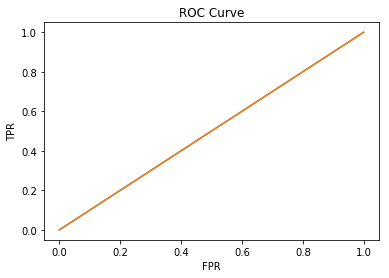

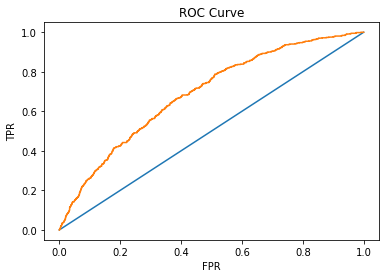

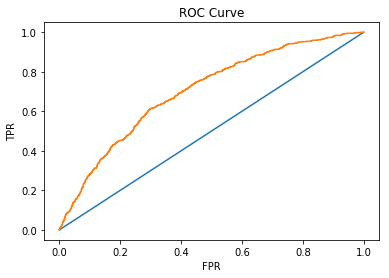

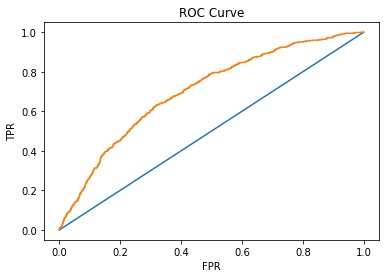

In [63]:
from sklearn.preprocessing import PolynomialFeatures

X = df_base_2
y = df_base.acquired


for i in range(0,4):
    
    print("Polynomial Degree: " + str(i))
    poly = PolynomialFeatures(degree=i)
    X2 = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=32)

    model = linear_model.LogisticRegression(class_weight = 'balanced')
    model.fit(X_train, y_train)

    # accuracy for test & train:
    train_acc=model.score(X_train, y_train)
    test_acc=model.score(X_test,y_test)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))

    y_true = y_test
    y_pred = model.predict(X_test)
    #print(conf)

    # TN, FN, TP, FP 

    conf = confusion_matrix(y_true, y_pred)

    tn, fp, fn, tp = conf.ravel()

    precision = (tp / (tp + fp))
    recall = (tp / (tp + fn))
    f1_score = 2*precision*recall/(precision + recall)

    #print ('\n')
    print ("Precision:              %0.2f" % precision)
    print ("Recall:                 %0.2f"% recall)
    print ("F1 Score:               %0.4f"% f1_score)
    
    y_score=model.predict_proba(X_test)[:,1]

    FPR, TPR,thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(FPR, TPR)

    plt.figure()
    # Plotting our Baseline..
    plt.plot([0,1],[0,1])
    plt.plot(FPR,TPR)
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    print("AUC: " +str(roc_auc))
    print ('\n')

# Polynomial 2, grid search for regularization

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=32)

model = linear_model.LogisticRegression(class_weight = 'balanced')

c_range = list(np.logspace(-3, 1, 256))
param_grid = dict(C=c_range)
grid = RandomizedSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1, verbose=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.1s finished
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'C': [0.001, 0.001036779197060366, 0.001074911103457137, 0.0011144454707535626, 0.00115543388033544, 0.0011979298107105216, 0.0012419887072831308, 0.001287668054695046, 0.0013350274518270132, 0.0013841286895587572, 0.0014350358313889448, 0.0014878152970202849, 0.0015425359490188...8.347734492114153, 8.654757464007233, 8.973072494285637, 9.303094895789918, 9.64525525623346, 10.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='precision', verbose=True)

In [65]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

# No real improvement from introducing regularization

LogisticRegression(C=0.8272695874133698, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
{'C': 0.8272695874133698}
0.19447645918031373


In [69]:
model.fit(X_train,y_train)

y_score=model.predict_proba(X_train)[:,1]

FPR, TPR,thresholds = roc_curve(y_train, y_score)

fpr_list = []

for i in range(0,len(FPR)):
     if TPR[i] > 0.05:
        fpr_list.append((i,FPR[i]))
        
thresh = thresholds[min(fpr_list, key = lambda t: t[1])[0]]

print(thresh)
    

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_train, y_pred))

conf = confusion_matrix(y_train, y_pred)
print(conf)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8018041396347059
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     16121
           1       0.42      0.05      0.09      2098

   micro avg       0.88      0.88      0.88     18219
   macro avg       0.65      0.52      0.51     18219
weighted avg       0.83      0.88      0.84     18219

[[15974   147]
 [ 1993   105]]


In [70]:
y_score=model.predict_proba(X_test)[:,1]

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)
print(conf)
        

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3985
           1       0.32      0.04      0.07       570

   micro avg       0.87      0.87      0.87      4555
   macro avg       0.60      0.51      0.50      4555
weighted avg       0.81      0.87      0.82      4555

[[3938   47]
 [ 548   22]]


# Random Forests

In [71]:
X = df_base_2
y = df_base.acquired

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [72]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(class_weight = 'balanced', n_estimators = 500)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [73]:
y_pred = randomforest.predict(X_test)

conf = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = conf.ravel()

print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))
print(conf)

precision = (tp / (tp + fp))
recall = (tp / (tp + fn))
f1_score = 2*precision*recall/(precision + recall)

print ('\n')
print ("Precision:              %0.2f" % precision)
print ("Recall:                 %0.2f" % recall)
print ("F1 Score:               %0.4f" % f1_score)


Training Data Accuracy: 0.64
Test Data Accuracy:     0.63
[[3906   79]
 [ 532   38]]


Precision:              0.32
Recall:                 0.07
F1 Score:               0.1106


0.6799000638358758


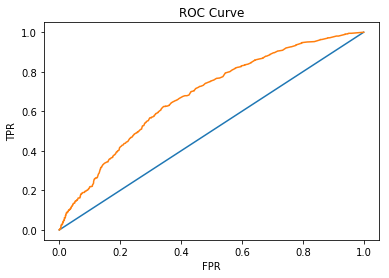

In [74]:
from sklearn.metrics import roc_curve, auc

y_score=randomforest.predict_proba(X_test)[:,1]

FPR, TPR,thresholds = roc_curve(y_test, y_score)
roc_auc = auc(FPR, TPR)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(FPR,TPR)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [75]:
y_score=randomforest.predict_proba(X_train)[:,1]

FPR, TPR,thresholds = roc_curve(y_train, y_score)

fpr_list = []

for i in range(0,len(FPR)):
     if TPR[i] > 0.05:
        fpr_list.append((i,FPR[i]))
        
thresh = thresholds[min(fpr_list, key = lambda t: t[1])[0]]

print(thresh)
    

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_train, y_pred))

conf = confusion_matrix(y_train, y_pred)
print(conf)

0.82
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16121
           1       0.95      0.05      0.09      2098

   micro avg       0.89      0.89      0.89     18219
   macro avg       0.92      0.52      0.52     18219
weighted avg       0.90      0.89      0.84     18219

[[16116     5]
 [ 1995   103]]


In [76]:
y_score=randomforest.predict_proba(X_test)[:,1]

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)
print(conf)
        

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3985
           1       0.23      0.01      0.01       570

   micro avg       0.87      0.87      0.87      4555
   macro avg       0.55      0.50      0.47      4555
weighted avg       0.79      0.87      0.82      4555

[[3975   10]
 [ 567    3]]


In [77]:
len(y_pred)

4555

# Testing hyperparameters for Random Trees

In [78]:
# Randomized grid, to narrow down space for GridSearch later

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Class weighting
class_weight = ['balanced']

In [79]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap, 'class_weight': class_weight}

In [80]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='precision',n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

# ADASYN oversampling Logistic Regression

In [ ]:

from imblearn.over_sampling import ADASYN


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, stratify=y)
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

model = linear_model.LogisticRegression()
model.fit(X_resampled, y_resampled)

# accuracy for test & train:
train_acc=model.score(X_resampled, y_resampled)
test_acc=model.score(X_test,y_test)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = model.predict(X_test)
# TN, FN, TP, FP 

conf = confusion_matrix(y_true, y_pred)
print(conf)

tn, fp, fn, tp = conf.ravel()

precision = (tp / (tp + fp))
recall = (tp / (tp + fn))
f1_score = 2*precision*recall/(precision + recall)

print ('\n')
print ("Precision:              %0.2f" % precision)
print ("Recall:                 %0.2f"% recall)
print ("F1 Score:               %0.4f"% f1_score)


In [ ]:
with open('log_model.pkl', 'wb') as picklefile:
    pickle.dump(model, picklefile)

# Testing different polynomials with ADASYN and Logistic Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = df_base_2
y = df_base.acquired


for i in range(0,4):
    
    print("Polynomial Degree: " + str(i))
    poly = PolynomialFeatures(degree=i)
    X2 = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=32)
    X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

    model = linear_model.LogisticRegression()
    model.fit(X_resampled, y_resampled)

    # accuracy for test & train:
    train_acc=model.score(X_resampled, y_resampled)
    test_acc=model.score(X_test,y_test)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))

    y_true = y_test
    y_pred = model.predict(X_test)
    #print(conf)

    # TN, FN, TP, FP 

    conf = confusion_matrix(y_true, y_pred)

    tn, fp, fn, tp = conf.ravel()

    precision = (tp / (tp + fp))
    recall = (tp / (tp + fn))
    f1_score = 2*precision*recall/(precision + recall)

    #print ('\n')
    print ("Precision:              %0.2f" % precision)
    print ("Recall:                 %0.2f"% recall)
    print ("F1 Score:               %0.4f"% f1_score)
    
    y_score=model.predict_proba(X_test)[:,1]

    FPR, TPR,thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(FPR, TPR)

    plt.figure()
    # Plotting our Baseline..
    plt.plot([0,1],[0,1])
    plt.plot(FPR,TPR)
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    print("AUC: " +str(roc_auc))
    print ('\n')

# Poly 2 Logistic Regression with ADASYN 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

poly = PolynomialFeatures(2)
X2 = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=32, stratify = y)
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

model = linear_model.LogisticRegression()
model.fit(X_resampled, y_resampled)

# accuracy for test & train:
train_acc=model.score(X_resampled, y_resampled)
test_acc=model.score(X_test,y_test)
print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))

y_true = y_test
y_pred = model.predict(X_test)
#print(conf)



    # TN, FN, TP, FP 

conf = confusion_matrix(y_true, y_pred)

tn, fp, fn, tp = conf.ravel()

precision = (tp / (tp + fp))
recall = (tp / (tp + fn))
f1_score = 2*precision*recall/(precision + recall)

#print ('\n')
print ("Precision:              %0.2f" % precision)
print ("Recall:                 %0.2f"% recall)
print ("F1 Score:               %0.4f"% f1_score)
    

In [ ]:
with open('log2_model.pkl', 'wb') as picklefile:
    pickle.dump(model, picklefile)

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score=model.predict_proba(X_test)[:,1]

FPR, TPR,thresholds = roc_curve(y_test, y_score)
roc_auc = auc(FPR, TPR)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(FPR,TPR)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
print(roc_auc)

In [ ]:
from sklearn.metrics import accuracy_score

y_score=model.predict_proba(X_train)[:,1]

FPR, TPR,thresholds = roc_curve(y_train, y_score)

fpr_list = []

for i in range(0,len(FPR)):
     if TPR[i] > 0.02:
        fpr_list.append((i,FPR[i]))
        
thresh = thresholds[min(fpr_list, key = lambda t: t[1])[0]]

print(thresh)
    

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_train, y_pred))

conf = confusion_matrix(y_train, y_pred)
print(conf)

print ('\n')

print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_train,y_pred))


In [ ]:
y_score=model.predict_proba(X_test)[:,1]

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)
print(conf)


print ('\n')

print(accuracy_score(y_test,model.predict(X_test)))
print(accuracy_score(y_test,y_pred))


# Random Forests with ADASYN

In [ ]:
X = df_base_2
y = df_base.acquired

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

randomforest = RandomForestClassifier(n_estimators = 500)
randomforest.fit(X_resampled, y_resampled)

y_pred = randomforest.predict(X_test)

conf = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = conf.ravel()

train_acc=randomforest.score(X_resampled, y_resampled)
test_acc=randomforest.score(X_test,y_test)

print("Training Data Accuracy: %0.2f" %(train_acc))
print("Test Data Accuracy:     %0.2f" %(test_acc))
print(conf)

precision = (tp / (tp + fp))
recall = (tp / (tp + fn))
f1_score = 2*precision*recall/(precision + recall)

print ('\n')
print ("Precision:              %0.2f" % precision)
print ("Recall:                 %0.2f" % recall)
print ("F1 Score:               %0.4f" % f1_score)

In [ ]:
y_score=randomforest.predict_proba(X_train)[:,1]

FPR, TPR,thresholds = roc_curve(y_train, y_score)

fpr_list = []

for i in range(0,len(FPR)):
     if TPR[i] > 0.02:
        fpr_list.append((i,FPR[i]))
        
thresh = thresholds[min(fpr_list, key = lambda t: t[1])[0]]

print(thresh)
    

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_train, y_pred))

conf = confusion_matrix(y_train, y_pred)
print(conf)

In [ ]:
y_score=randomforest.predict_proba(X_test)[:,1]

y_pred = []

for i in range(0,len(y_score)):
    if y_score [i] > thresh:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)
print(conf)